In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from unidecode import unidecode
from pypostalcode import PostalCodeDatabase
from wordcloud import WordCloud, STOPWORDS
sns.set()

In [2]:
df = pd.read_csv('df_clean.csv',na_values= -1,index_col='adId')

In [3]:
df.head()

,Unnamed: 0,Title,Price,Description,Location,URL,Type,days_since,Furnished_room,Pets_allowed_room,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC
adId,,,,,,,,,,,,,,,,,
1569922397,0,Belle Chambre Meublée T.Inclus avec WiFi,470.0,"""Salut à vous tous, Hello, Hallo, Hola\nJe su...",", Montreal H2A1W7 QC, Canada",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0
1569922379,1,"STYLE CONDO, FACE AU PARC, COTE-DES-NEIGES",1280.0,1000pc\n2 chambres fermees\nRénove en 2019\nD...,"6658 Ave McLynn, Montreal, QC H3X 2R6, Canada",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,NaN,NaN,0.0,'1 an',1 juillet 2021,0.0,1000.0,0,0.0
1558165068,2,LOUIS 438-939-9179. 1 chambre à louer disponib...,940.0,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*...","11945 Rue Lachapelle, Montréal, QC H4J 2M3, Ca...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,NaN,NaN,0.0,'1 an',1 mars 2021,0.0,550.0,0,0.0
1505844985,3,DDO @ 514-683-2252 - 4.5 Unit,1100.0,"Renovated building Heated, hot water and avail...","4452 des Sources, Dollad des Ormeaux, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,0.0,'1 an',NaN,0.0,NaN,0,NaN
1569642212,4,Condo for rent,1600.0,"Spacious and modern 4 1/2 for rent, bright, wi...","4885 Boul Henri-Bourassa O, Saint-Laurent, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,1.0,'1 an',1 juillet 2021,1.0,940.0,0,1.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Price', 'Description', 'Location', 'URL',
       'Type', 'days_since', 'Furnished_room', 'Pets_allowed_room', 'Parking',
       'Lease_term', 'moving_date', 'pets_allowed_apt', 'size (sq.ft.)',
       'furnished_apt', 'AC'],
      dtype='object')

In [5]:
df= df.drop(['Unnamed: 0'], axis=1)
df

,Title,Price,Description,Location,URL,Type,days_since,Furnished_room,Pets_allowed_room,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC
adId,,,,,,,,,,,,,,,,
1569922397,Belle Chambre Meublée T.Inclus avec WiFi,470.0,"""Salut à vous tous, Hello, Hallo, Hola\nJe su...",", Montreal H2A1W7 QC, Canada",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0
1569922379,"STYLE CONDO, FACE AU PARC, COTE-DES-NEIGES",1280.0,1000pc\n2 chambres fermees\nRénove en 2019\nD...,"6658 Ave McLynn, Montreal, QC H3X 2R6, Canada",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,NaN,NaN,0.0,'1 an',1 juillet 2021,0.0,1000.0,0,0.0
1558165068,LOUIS 438-939-9179. 1 chambre à louer disponib...,940.0,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*...","11945 Rue Lachapelle, Montréal, QC H4J 2M3, Ca...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,NaN,NaN,0.0,'1 an',1 mars 2021,0.0,550.0,0,0.0
1505844985,DDO @ 514-683-2252 - 4.5 Unit,1100.0,"Renovated building Heated, hot water and avail...","4452 des Sources, Dollad des Ormeaux, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,0.0,'1 an',NaN,0.0,NaN,0,NaN
1569642212,Condo for rent,1600.0,"Spacious and modern 4 1/2 for rent, bright, wi...","4885 Boul Henri-Bourassa O, Saint-Laurent, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,1.0,'1 an',1 juillet 2021,1.0,940.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,*PROMO! Tour du Parc - Amazing views! All incl...,1135.0,"""Contactez le Groupe Hazelview dès aujourdhui...","1150 rue Sherbrooke Est, Montreal, QC, H2L 1L8",NaN,NaN,1,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0,0.0
0,"*PROMO! Studio, Fully renovated - Near Concord...",1045.0,"""Cet immeuble bien entretenu est situé dans u...","2050 Boulevard de Maisonneuve Ouest, Montreal,...",NaN,NaN,1,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0,0.0
0,"*PROMO! 3 1/2, Fully renovated - Near Concordi...",1250.0,"""Cet immeuble bien entretenu est situé dans u...","2050 Boulevard de Maisonneuve Ouest, Montreal,...",NaN,NaN,1,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0,0.0


In [6]:
df.Title.value_counts()

Association des propriétaires du Québec                             9
4 ½ neuf à Griffintown à proximité des commerces                    5
*PROMO! La Mosaïque - Condo-Style- Downtown-Insuite Laundry!        4
Adorable 3 1/2 - Superbe quartier: Rosemont                         4
Belle Chambre Meublée T.Inclus avec WiFi                            4
                                                                   ..
2,323 SF (+ Basement) Retail Space For Rent on Mont Royal East!     1
Bright Modern 3 1/2 St Henri - JUNE FREE                            1
3 1/2 à louer, Ahuntsic. Ensoleillé, très propre, tranquille        1
Chambre à louer dans un immense appart | Plateau                    1
Cession de bail pour 1e septembre: Grand 5 1/2, animaux acceptés    1
Name: Title, Length: 1488, dtype: int64

In [7]:
def apt_size(title):
    if 'condo' in title.lower():
        return 'condo'
    elif ' 1 1/2' in title.lower():
        return 'studio'
    elif '2 1/2' in title.lower():
        return '2 1/2'
    elif '3 1/2' in title.lower():
        return '3 1/2'
    elif '4 1/2' in title.lower():
        return '4 1/2'  
    elif 'studio' in title.lower():
        return 'studio'
    else:
        return 'na'

In [9]:
df['apt_size']= df.Title.apply(apt_size)
df['apt_size']

adId
1569922397        na
1569922379     condo
1558165068        na
1505844985        na
1569642212     condo
               ...  
0                 na
0             studio
0              3 1/2
0             studio
0                 na
Name: apt_size, Length: 1626, dtype: object

In [10]:
df['apt_size'].value_counts()

na        893
4 1/2     210
3 1/2     186
condo     183
studio    112
2 1/2      42
Name: apt_size, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1569922397 to 0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1626 non-null   object 
 1   Price              1541 non-null   float64
 2   Description        1626 non-null   object 
 3   Location           1626 non-null   object 
 4   URL                1617 non-null   object 
 5   Type               1617 non-null   object 
 6   days_since         1626 non-null   int64  
 7   Furnished_room     284 non-null    float64
 8   Pets_allowed_room  177 non-null    float64
 9   Parking            1393 non-null   float64
 10  Lease_term         1338 non-null   object 
 11  moving_date        1137 non-null   object 
 12  pets_allowed_apt   1588 non-null   float64
 13  size (sq.ft.)      974 non-null    float64
 14  furnished_apt      1626 non-null   int64  
 15  AC                 1573 non-null   float64
 16  apt_size          

In [12]:
df.describe()

,Price,days_since,Furnished_room,Pets_allowed_room,Parking,pets_allowed_apt,size (sq.ft.),furnished_apt,AC
count,1541.000000,1626.000000,284.000000,177.000000,1393.000000,1588.000000,974.000000,1626.000000,1573.000000
mean,1971.090201,1.552276,0.693662,0.152542,0.174444,0.343199,812.168378,0.168512,0.207883
std,14484.622678,2.748321,0.461786,0.360566,0.424307,0.474927,859.149760,0.374435,0.405922
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,850.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000,0.000000
50%,1195.000000,1.000000,1.000000,0.000000,0.000000,0.000000,750.000000,0.000000,0.000000
75%,1500.000000,1.000000,1.000000,0.000000,0.000000,1.000000,991.500000,0.000000,0.000000
max,399000.000000,29.000000,1.000000,1.000000,2.000000,1.000000,18001.000000,1.000000,1.000000


## Checking missing data

In [13]:
missing_values= df.isnull().sum().sort_values(ascending=False)/df.shape[0]
missing_values

Pets_allowed_room    0.891144
Furnished_room       0.825338
size (sq.ft.)        0.400984
moving_date          0.300738
Lease_term           0.177122
Parking              0.143296
Price                0.052276
AC                   0.032595
pets_allowed_apt     0.023370
URL                  0.005535
Type                 0.005535
furnished_apt        0.000000
Title                0.000000
days_since           0.000000
Location             0.000000
Description          0.000000
apt_size             0.000000
dtype: float64

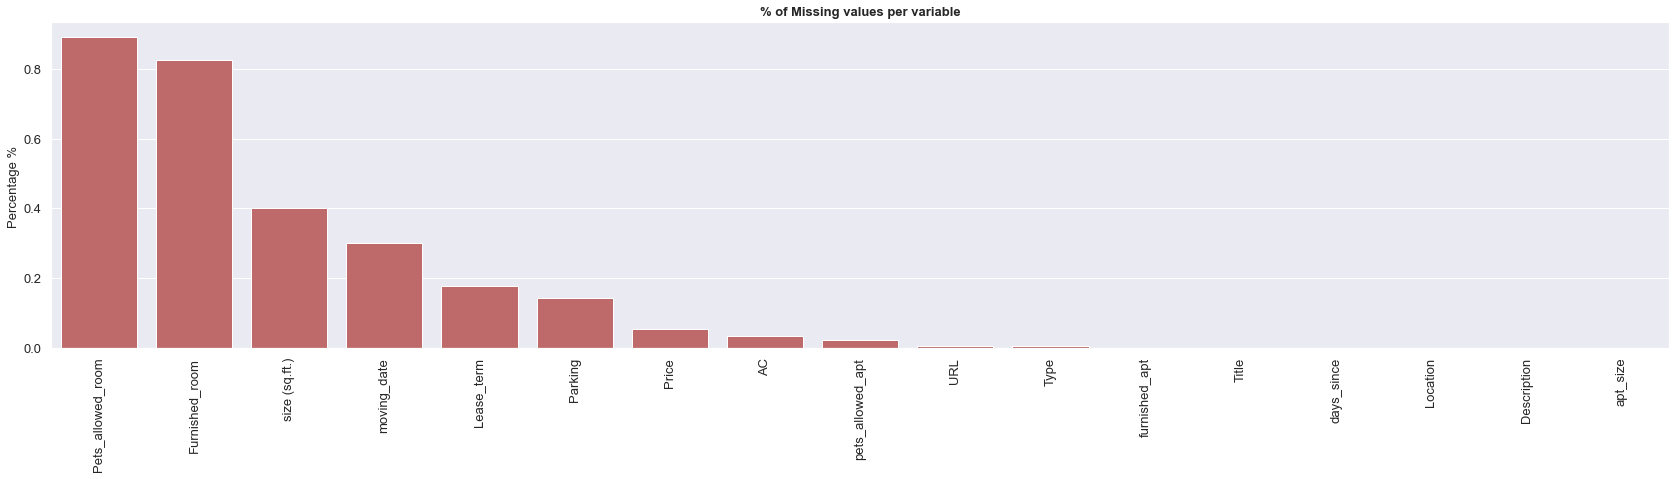

In [14]:
##Plotting missig values
plt.figure(figsize= (29,6))
sns.barplot(x= missing_values.index,
            y= missing_values,color='indianred')
plt.xticks(rotation=90,fontsize= 13)
plt.yticks(fontsize=13)
plt.title("% of Missing values per variable",fontsize=13, fontweight= "bold")
plt.ylabel("Percentage % ", fontsize=13)
plt.show()

In [15]:
df= df.drop(['Pets_allowed_room', 'Furnished_room'], axis=1)
df.head(5)

,Title,Price,Description,Location,URL,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size
adId,,,,,,,,,,,,,,,
1569922397,Belle Chambre Meublée T.Inclus avec WiFi,470.0,"""Salut à vous tous, Hello, Hallo, Hola\nJe su...",", Montreal H2A1W7 QC, Canada",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,NaN,NaN,NaN,0.0,NaN,0,0.0,na
1569922379,"STYLE CONDO, FACE AU PARC, COTE-DES-NEIGES",1280.0,1000pc\n2 chambres fermees\nRénove en 2019\nD...,"6658 Ave McLynn, Montreal, QC H3X 2R6, Canada",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,0.0,'1 an',1 juillet 2021,0.0,1000.0,0,0.0,condo
1558165068,LOUIS 438-939-9179. 1 chambre à louer disponib...,940.0,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*...","11945 Rue Lachapelle, Montréal, QC H4J 2M3, Ca...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,0.0,'1 an',1 mars 2021,0.0,550.0,0,0.0,na
1505844985,DDO @ 514-683-2252 - 4.5 Unit,1100.0,"Renovated building Heated, hot water and avail...","4452 des Sources, Dollad des Ormeaux, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,0.0,'1 an',NaN,0.0,NaN,0,NaN,na
1569642212,Condo for rent,1600.0,"Spacious and modern 4 1/2 for rent, bright, wi...","4885 Boul Henri-Bourassa O, Saint-Laurent, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,1.0,'1 an',1 juillet 2021,1.0,940.0,0,1.0,condo


C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


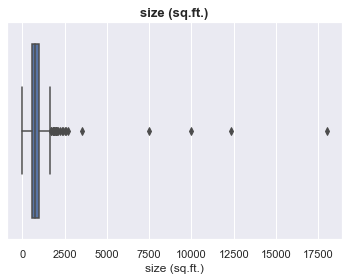

In [16]:
##checking outliers

sns.boxplot(df['size (sq.ft.)'])
plt.title('size (sq.ft.)',fontsize=13, fontweight= "bold")
plt.show()

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


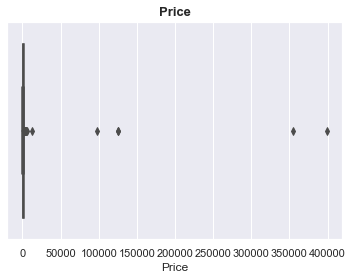

In [17]:

sns.boxplot(df['Price'])
plt.title('Price',fontsize=13, fontweight= "bold")
plt.show()

In [18]:
##we remove extreme values
data_outliers= df[((df.Price < df.Price.quantile(.995)) & (df.Price > df.Price.quantile(.005))) ]

In [19]:
data_outliers.head()

,Title,Price,Description,Location,URL,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size
adId,,,,,,,,,,,,,,,
1569922397,Belle Chambre Meublée T.Inclus avec WiFi,470.0,"""Salut à vous tous, Hello, Hallo, Hola\nJe su...",", Montreal H2A1W7 QC, Canada",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,NaN,NaN,NaN,0.0,NaN,0,0.0,na
1569922379,"STYLE CONDO, FACE AU PARC, COTE-DES-NEIGES",1280.0,1000pc\n2 chambres fermees\nRénove en 2019\nD...,"6658 Ave McLynn, Montreal, QC H3X 2R6, Canada",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,0.0,'1 an',1 juillet 2021,0.0,1000.0,0,0.0,condo
1558165068,LOUIS 438-939-9179. 1 chambre à louer disponib...,940.0,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*...","11945 Rue Lachapelle, Montréal, QC H4J 2M3, Ca...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,0.0,'1 an',1 mars 2021,0.0,550.0,0,0.0,na
1505844985,DDO @ 514-683-2252 - 4.5 Unit,1100.0,"Renovated building Heated, hot water and avail...","4452 des Sources, Dollad des Ormeaux, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,0.0,'1 an',NaN,0.0,NaN,0,NaN,na
1569642212,Condo for rent,1600.0,"Spacious and modern 4 1/2 for rent, bright, wi...","4885 Boul Henri-Bourassa O, Saint-Laurent, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,1.0,'1 an',1 juillet 2021,1.0,940.0,0,1.0,condo


In [20]:
def tryconvert(value, default, *types):
    for t in types:
        try:
            return t(value)
        except (ValueError, TypeError):
            continue
    return default

In [21]:
#Price
data_outliers["Price"]= data_outliers["Price"].apply(lambda x: tryconvert(x, x, int))
data_outliers["Price"]

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


adId
1569922397     470
1569922379    1280
1558165068     940
1505844985    1100
1569642212    1600
              ... 
0             1135
0             1045
0             1250
0              810
0             1595
Name: Price, Length: 1525, dtype: int64

In [22]:
def moving_date_simplifier(moving_date):
    if 'janvier' in moving_date.lower():
        return 'january'
    elif 'février' in moving_date.lower():
        return 'february'
    elif 'mars' in moving_date.lower():
        return 'march'
    elif 'avril' in moving_date.lower():
        return 'april'
    elif 'mai' in moving_date.lower():
        return 'may'  
    elif 'juin' in moving_date.lower():
        return 'june'
    elif 'juillet' in moving_date.lower():
        return 'july'
    elif 'août' in moving_date.lower():
        return 'august'
    elif 'septembre' in moving_date.lower():
        return 'september'    
    elif 'octobre' in moving_date.lower():
        return 'october'
    elif 'novembre' in moving_date.lower():
        return 'november'
    elif 'décembre' in moving_date.lower():
        return 'december'
    else:
        return 'na'

In [23]:
#data_outliers["Parking"]= data_outliers["Parking"].apply(lambda x: int(x))
data_outliers["moving_date"]= data_outliers["moving_date"].astype(str).apply(moving_date_simplifier)
data_outliers["moving_date"].value_counts()

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


july         543
na           455
june         323
august        64
may           46
september     25
april         24
october       13
january        9
march          9
february       7
december       6
november       1
Name: moving_date, dtype: int64

In [24]:
#title length 
data_outliers["Title_length"]= data_outliers["Title"].apply(lambda x: len(x))

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#Location Parsing
data_outliers["Location"]= data_outliers["Location"].apply(lambda x: x.upper())

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
def postal_code_extraction(address):
    compiler= re.compile(r'[A-Z]\d[A-Z] *\d[A-Z]\d')
    try:        
        return compiler.search(address).group()
    except AttributeError:
        return compiler.search(address)

In [27]:
data_outliers["postal_code"]= data_outliers["Location"].apply(postal_code_extraction)

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data_outliers.sample()

,Title,Price,Description,Location,URL,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size,Title_length,postal_code
adId,,,,,,,,,,,,,,,,,
1565232043,Furnished! Downtown! McGill/Concordia/UQAM! FR...,699,Located minutes to downtown - this location is...,"1430 RUE CITY COUNCILLORS, MONTREAL, QC, H3B 1B4",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,0.0,'1 an',na,0.0,NaN,1,0.0,na,54,H3B 1B4


In [29]:
##Functions to get precise longitude, latitude and city features from address

def longitude_extraction(postal_code):
    pcdb = PostalCodeDatabase()
    if postal_code != None:  
        pc=postal_code[:3]
        location = pcdb[pc]
        longitude= location.longitude 
        return longitude
    else:
        return -1  
    
def latitude_extraction(postal_code):
    pcdb = PostalCodeDatabase()
    if postal_code != None:  
        pc=postal_code[:3]
        location = pcdb[pc]
        latitude= location.latitude
        return latitude
    else:
        return -1  

def city_extraction(postal_code):
    pcdb = PostalCodeDatabase()
    if postal_code != None:  
        pc=postal_code[:3]
        location = pcdb[pc]
        city= location.city
        return city
    else:
        return -1      
    

In [30]:
data_outliers["longitude"]= data_outliers["postal_code"].apply(longitude_extraction)

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_outliers["latitude"]= data_outliers["postal_code"].apply(latitude_extraction)

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_outliers["District"]= data_outliers["postal_code"].apply(city_extraction)

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_outliers.head(5)

,Title,Price,Description,Location,URL,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size,Title_length,postal_code,longitude,latitude,District
adId,,,,,,,,,,,,,,,,,,,,
1569922397,Belle Chambre Meublée T.Inclus avec WiFi,470,"""Salut à vous tous, Hello, Hallo, Hola\nJe su...",", MONTREAL H2A1W7 QC, CANADA",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,NaN,NaN,na,0.0,NaN,0,0.0,na,40,H2A1W7,-73.6118,45.5583,Saint-Michel East
1569922379,"STYLE CONDO, FACE AU PARC, COTE-DES-NEIGES",1280,1000pc\n2 chambres fermees\nRénove en 2019\nD...,"6658 AVE MCLYNN, MONTREAL, QC H3X 2R6, CANADA",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,0.0,'1 an',july,0.0,1000.0,0,0.0,condo,42,H3X 2R6,-73.6483,45.4915,Hampstead
1558165068,LOUIS 438-939-9179. 1 chambre à louer disponib...,940,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*...","11945 RUE LACHAPELLE, MONTRÉAL, QC H4J 2M3, CA...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,0.0,'1 an',march,0.0,550.0,0,0.0,na,63,H4J 2M3,-73.7231,45.5353,Cartierville Central
1505844985,DDO @ 514-683-2252 - 4.5 Unit,1100,"Renovated building Heated, hot water and avail...","4452 DES SOURCES, DOLLAD DES ORMEAUX, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,0.0,'1 an',na,0.0,NaN,0,NaN,na,29,H8Y 3B9,-73.8162,45.5145,Roxboro
1569642212,Condo for rent,1600,"Spacious and modern 4 1/2 for rent, bright, wi...","4885 BOUL HENRI-BOURASSA O, SAINT-LAURENT, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,1.0,'1 an',july,1.0,940.0,0,1.0,condo,14,H4L 0A5,-73.6974,45.5269,Saint-Laurent Inner Northeast


In [34]:
data_outliers['desc_len'] = data_outliers['Description'].apply(lambda x: len(x))
data_outliers['desc_len']

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


adId
1569922397     814
1569922379     910
1558165068     336
1505844985     281
1569642212     546
              ... 
0             4265
0             3565
0             3957
0             2774
0             3598
Name: desc_len, Length: 1525, dtype: int64

In [35]:
price_per_district= pd.pivot_table(data_outliers, index = ['District'], values = 'Price').sort_values('Price', ascending = False)
price_per_district

,Price
District,
Old Montreal,2300.000000
Downtown Montreal North,2120.000000
Mount Royal North,2061.428571
Vaudreuil- Dorion,2000.000000
Petite-Bourgogne,1927.391304
...,...
Saint-Laurent East,550.000000
Sainte-Geneviève,495.000000
Pointe-Aux-Trembles,491.666667


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

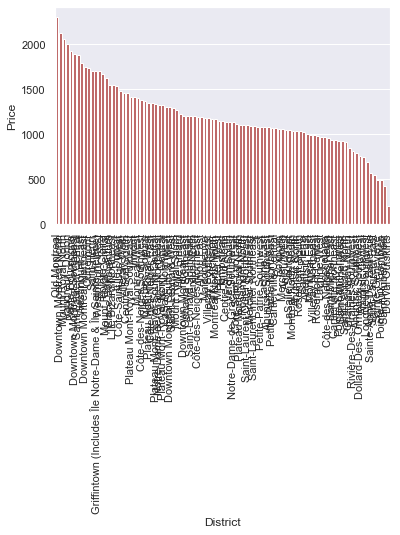

In [36]:
sns.barplot(x= price_per_district.index, y=price_per_district.Price ,color='indianred')
plt.xticks(rotation=90)
plt.title

In [37]:
df_pivots = data_outliers[[ 'Type','days_since', 'Parking','Lease_term', 'moving_date', 'pets_allowed_apt', 'size (sq.ft.)',
                           'furnished_apt', 'AC', 'Title_length', 'District', 'desc_len','Price']]


In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = ['Price']).sort_values('Price', ascending = False))

Type
                 Price
Type                  
apartment  1268.824081
Room       1172.219409
days_since
                  Price
days_since             
13          3200.000000
17          1823.750000
12          1541.666667
25          1500.000000
9           1446.666667
15          1400.000000
8           1342.250000
21          1330.000000
2           1317.608696
16          1264.800000
1           1252.837722
3           1229.714286
6           1217.500000
7           1211.000000
10          1205.750000
4           1166.900000
5           1165.000000
18          1115.000000
29          1097.500000
14          1031.428571
23          1031.333333
19           950.000000
28           775.000000
22           630.000000
Parking
               Price
Parking             
2.0      1505.789474
1.0      1339.353933
0.0      1247.400357
Lease_term
                         Price
Lease_term                    
 '1 an'            1270.922204
 'Au mois'         1215.777778
 'Non disponible'  1

ValueError: Grouper for 'Price' not 1-dimensional

### Wordcloud for 'Description' and 'Title' columns

In [39]:
data_outliers['Description']= data_outliers['Description'].apply(lambda x: unidecode(x.lower()))
data_outliers['Description']

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


adId
1569922397    "salut a vous tous, hello, hallo, hola\nje sui...
1569922379    1000pc\n2 chambres fermees\nrenove en 2019\nde...
1558165068    "une visite simpose\n* 1 chambres a coucher\n*...
1505844985    renovated building heated, hot water and avail...
1569642212    spacious and modern 4 1/2 for rent, bright, wi...
                                    ...                        
0             "contactez le groupe hazelview des aujourdhui!...
0             "cet immeuble bien entretenu est situe dans un...
0             "cet immeuble bien entretenu est situe dans un...
0             "contactez les proprietes hazelview aujourdhui...
0             "contactez les proprietes hazelview aujourdhui...
Name: Description, Length: 1525, dtype: object

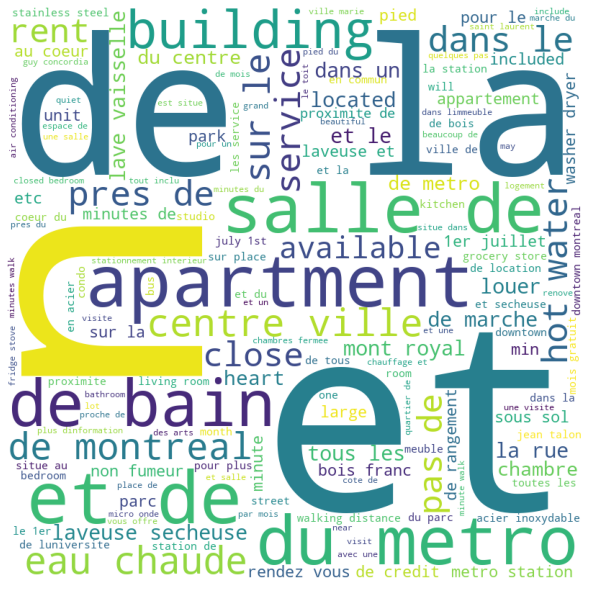

In [40]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the column
for val in data_outliers.Description:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [41]:
data_outliers['Title']= data_outliers['Title'].apply(lambda x: unidecode(x.lower()))
data_outliers['Title']

C:\Users\Vanessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


adId
1569922397             belle chambre meublee t.inclus avec wifi
1569922379           style condo, face au parc, cote-des-neiges
1558165068    louis 438-939-9179. 1 chambre a louer disponib...
1505844985                        ddo @ 514-683-2252 - 4.5 unit
1569642212                                       condo for rent
                                    ...                        
0             *promo! tour du parc - amazing views! all incl...
0             *promo! studio, fully renovated - near concord...
0             *promo! 3 1/2, fully renovated - near concordi...
0                          *promo! studio - all included - jmsb
0             fully renovated - great location - spacious su...
Name: Title, Length: 1525, dtype: object

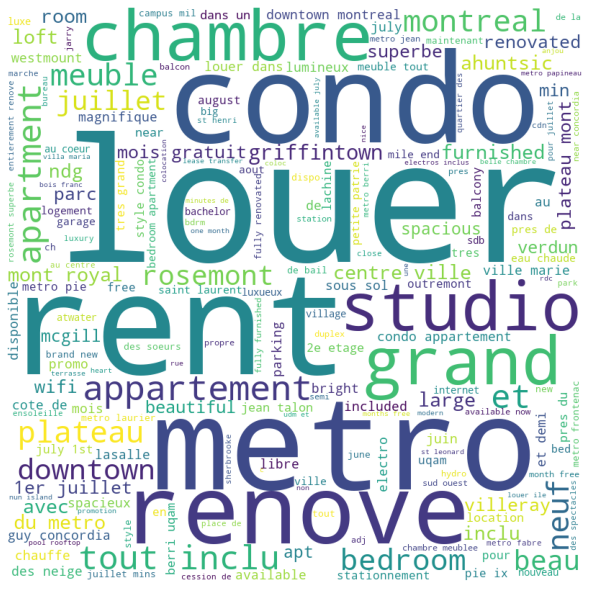

In [42]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the column
for val in data_outliers.Title:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [43]:
data_eda= data_outliers.to_csv("geo_data.csv")

In [44]:
data_outliers.head()

,Title,Price,Description,Location,URL,Type,days_since,Parking,Lease_term,moving_date,...,size (sq.ft.),furnished_apt,AC,apt_size,Title_length,postal_code,longitude,latitude,District,desc_len
adId,,,,,,,,,,,,,,,,,,,,,
1569922397,belle chambre meublee t.inclus avec wifi,470,"""salut a vous tous, hello, hallo, hola\nje sui...",", MONTREAL H2A1W7 QC, CANADA",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,NaN,NaN,na,...,NaN,0,0.0,na,40,H2A1W7,-73.6118,45.5583,Saint-Michel East,814
1569922379,"style condo, face au parc, cote-des-neiges",1280,1000pc\n2 chambres fermees\nrenove en 2019\nde...,"6658 AVE MCLYNN, MONTREAL, QC H3X 2R6, CANADA",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,0.0,'1 an',july,...,1000.0,0,0.0,condo,42,H3X 2R6,-73.6483,45.4915,Hampstead,910
1558165068,louis 438-939-9179. 1 chambre a louer disponib...,940,"""une visite simpose\n* 1 chambres a coucher\n*...","11945 RUE LACHAPELLE, MONTRÉAL, QC H4J 2M3, CA...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,0.0,'1 an',march,...,550.0,0,0.0,na,63,H4J 2M3,-73.7231,45.5353,Cartierville Central,336
1505844985,ddo @ 514-683-2252 - 4.5 unit,1100,"renovated building heated, hot water and avail...","4452 DES SOURCES, DOLLAD DES ORMEAUX, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,0.0,'1 an',na,...,NaN,0,NaN,na,29,H8Y 3B9,-73.8162,45.5145,Roxboro,281
1569642212,condo for rent,1600,"spacious and modern 4 1/2 for rent, bright, wi...","4885 BOUL HENRI-BOURASSA O, SAINT-LAURENT, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,1.0,'1 an',july,...,940.0,0,1.0,condo,14,H4L 0A5,-73.6974,45.5269,Saint-Laurent Inner Northeast,546


In [45]:
data_outliers.columns

Index(['Title', 'Price', 'Description', 'Location', 'URL', 'Type',
       'days_since', 'Parking', 'Lease_term', 'moving_date',
       'pets_allowed_apt', 'size (sq.ft.)', 'furnished_apt', 'AC', 'apt_size',
       'Title_length', 'postal_code', 'longitude', 'latitude', 'District',
       'desc_len'],
      dtype='object')

In [46]:
data_eda= data_outliers.drop(['Title','Description', 'Location', 'URL'], axis=1)
data_eda

,Price,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size,Title_length,postal_code,longitude,latitude,District,desc_len
adId,,,,,,,,,,,,,,,,,
1569922397,470,Room,1,NaN,NaN,na,0.0,NaN,0,0.0,na,40,H2A1W7,-73.6118,45.5583,Saint-Michel East,814
1569922379,1280,apartment,1,0.0,'1 an',july,0.0,1000.0,0,0.0,condo,42,H3X 2R6,-73.6483,45.4915,Hampstead,910
1558165068,940,apartment,3,0.0,'1 an',march,0.0,550.0,0,0.0,na,63,H4J 2M3,-73.7231,45.5353,Cartierville Central,336
1505844985,1100,apartment,2,0.0,'1 an',na,0.0,NaN,0,NaN,na,29,H8Y 3B9,-73.8162,45.5145,Roxboro,281
1569642212,1600,apartment,2,1.0,'1 an',july,1.0,940.0,0,1.0,condo,14,H4L 0A5,-73.6974,45.5269,Saint-Laurent Inner Northeast,546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1135,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,na,51,H2L 1L8,-73.5744,45.5252,Centre-Sud South,4265
0,1045,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,studio,64,H3H 1K7,-73.5967,45.5123,Downtown Montreal South & West,3565
0,1250,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,3 1/2,63,H3H 1K7,-73.5967,45.5123,Downtown Montreal South & West,3957


In [47]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1569922397 to 0
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1525 non-null   int64  
 1   Type              1516 non-null   object 
 2   days_since        1525 non-null   int64  
 3   Parking           1316 non-null   float64
 4   Lease_term        1279 non-null   object 
 5   moving_date       1525 non-null   object 
 6   pets_allowed_apt  1487 non-null   float64
 7   size (sq.ft.)     924 non-null    float64
 8   furnished_apt     1525 non-null   int64  
 9   AC                1473 non-null   float64
 10  apt_size          1525 non-null   object 
 11  Title_length      1525 non-null   int64  
 12  postal_code       1486 non-null   object 
 13  longitude         1525 non-null   float64
 14  latitude          1525 non-null   float64
 15  District          1525 non-null   object 
 16  desc_len          1525 non-null   in

In [48]:
categorical_data= data_eda.select_dtypes('object')
numerical_data= data_eda.select_dtypes('number')

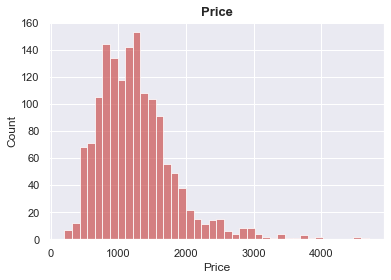

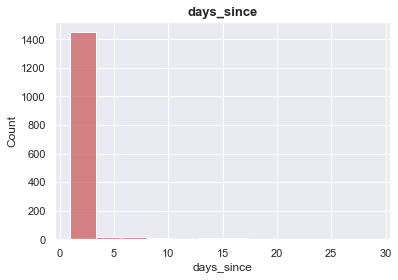

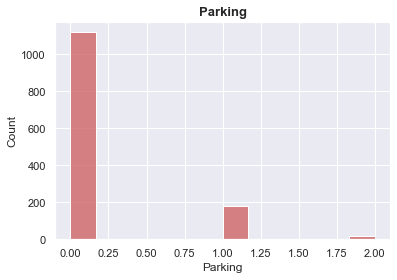

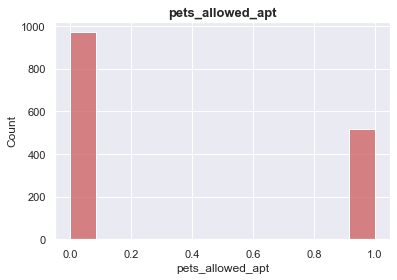

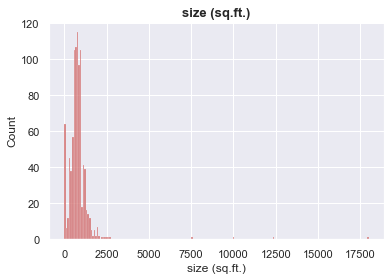

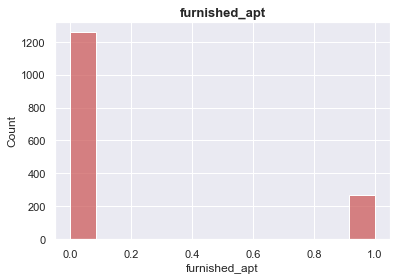

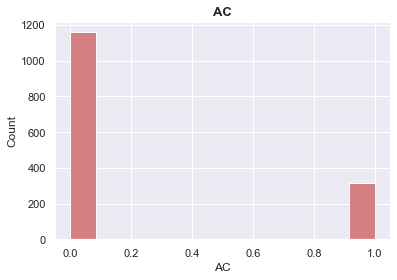

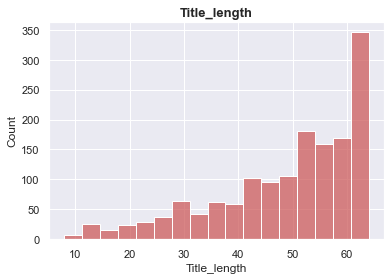

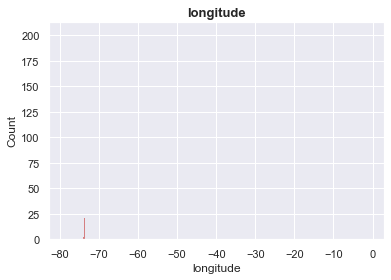

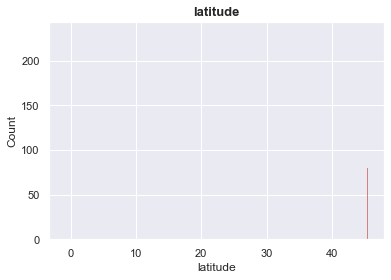

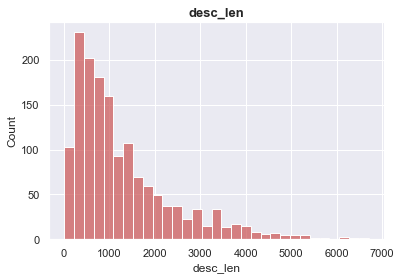

In [49]:
for i in numerical_data.columns:
    sns.histplot(numerical_data[i],color='indianred')
    plt.title(i,fontsize=13, fontweight= "bold")
    plt.show()

graph for Type: total = 2


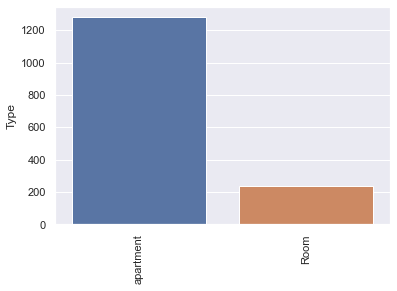

graph for Lease_term: total = 3


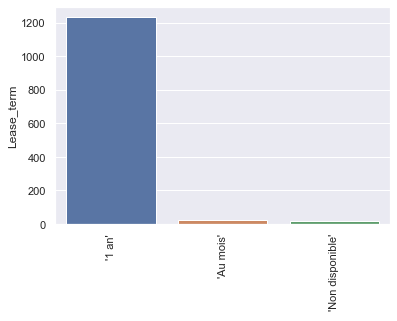

graph for moving_date: total = 13


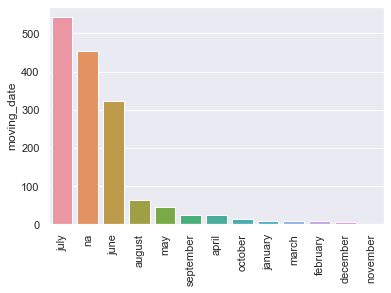

graph for apt_size: total = 6


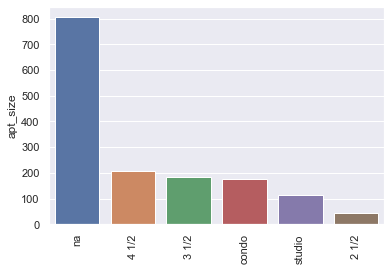

graph for postal_code: total = 995


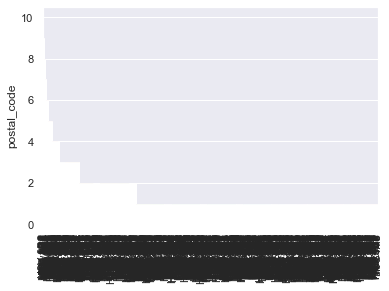

graph for District: total = 95


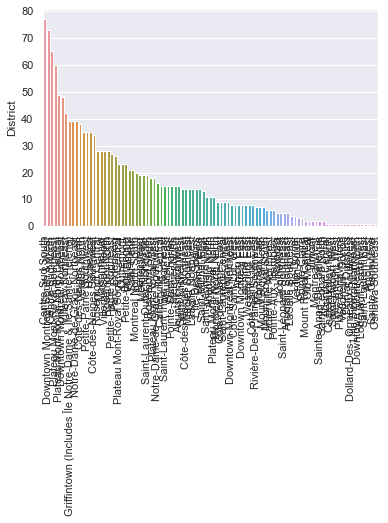

In [50]:
for i in categorical_data.columns:
    cat_num = categorical_data[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [51]:
data_eda

,Price,Type,days_since,Parking,Lease_term,moving_date,pets_allowed_apt,size (sq.ft.),furnished_apt,AC,apt_size,Title_length,postal_code,longitude,latitude,District,desc_len
adId,,,,,,,,,,,,,,,,,
1569922397,470,Room,1,NaN,NaN,na,0.0,NaN,0,0.0,na,40,H2A1W7,-73.6118,45.5583,Saint-Michel East,814
1569922379,1280,apartment,1,0.0,'1 an',july,0.0,1000.0,0,0.0,condo,42,H3X 2R6,-73.6483,45.4915,Hampstead,910
1558165068,940,apartment,3,0.0,'1 an',march,0.0,550.0,0,0.0,na,63,H4J 2M3,-73.7231,45.5353,Cartierville Central,336
1505844985,1100,apartment,2,0.0,'1 an',na,0.0,NaN,0,NaN,na,29,H8Y 3B9,-73.8162,45.5145,Roxboro,281
1569642212,1600,apartment,2,1.0,'1 an',july,1.0,940.0,0,1.0,condo,14,H4L 0A5,-73.6974,45.5269,Saint-Laurent Inner Northeast,546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1135,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,na,51,H2L 1L8,-73.5744,45.5252,Centre-Sud South,4265
0,1045,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,studio,64,H3H 1K7,-73.5967,45.5123,Downtown Montreal South & West,3565
0,1250,NaN,1,NaN,NaN,na,0.0,NaN,0,0.0,3 1/2,63,H3H 1K7,-73.5967,45.5123,Downtown Montreal South & West,3957


<AxesSubplot:>

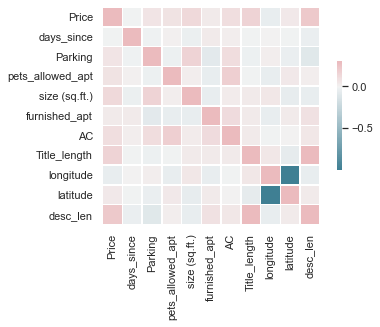

In [52]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_eda.corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
data_eda.to_csv("data_eda.csv")